# 1. Hafta Lab: Doğrusal Regresyon
### BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
### İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
#### Dr. Ferhat Özgür Çatak

Bu lab çalışmasında doğrusal regresyon yöntemini sentetik bir kümesine uygulayacağız.

In [1]:
# kutuphaleri yukle
import pandas as pd
import matplotlib.pyplot as plt

Pandas kütüphanesi kullanarak *ds1.txt* dosyası *verikumesi* degişkenine (dataframe) atanmaktadır. *verikumesi* değişkenin boyutları (21,2) olduğu bulunur. 21 satır ve 2 sütundan oluşmaktadır. $verikumesi \in \mathbb{R}^{21 \times 2}$

In [2]:
# veri kumesini oku
verikumesi = pd.read_csv("ds1.txt",delimiter="\t")
verikumesi.shape

(21, 2)

Pandas kütüphanesi kodlama açısından Matlab ile benzerlik göstermektedir. *:* karakteri bütün satırları seçmek için kullanılır. *:-1* ifadesiyle sondan bir önceki sütun hariç bütün sütunlar seçilmektedir. Bu lab uygulamasında kullanılan sentetik veri kümesi 2 sütunlu olduğu için ilk sütun seçilecektir. 

In [3]:
X = verikumesi.iloc[:,:-1].values
y = verikumesi.iloc[:,1].values
print('X:',X.shape, 'y:',y.shape)

X: (21, 1) y: (21,)


$X$ girdi veri kümesi, ve $y$ çıktı değerlerini kullanarak eğitim veri kümesi ve test veri kümesi oluşturumak amacıyla **train_test_split** metodu kullanılmaktadır. **test_size** değişkeni **0.3** seçilerek **%70'i** eğitim veri kümesi (*X_train, y_train)*,  **%30'u**  test veri kümesi (*X_test, y_test*) olarak ayrılmaktadır.

In [4]:
# veri kumesini egitim ve test olarak parcala
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('X_train:', X_train.shape, 'X_test:',X_test.shape)

X_train: (14, 1) X_test: (7, 1)


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


*regressor* değişkeni ile *LinearRegression* sınıfından bir örnek oluşturulmaktadır. **regressor.fit** metodunun çağırımı ile algoritmanın eğitimi yapılmaktadır.

In [5]:
# dogrusal regresyon modeli
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Eğitilmiş olan **regressor** isimli doğrusal regresyon modeli kullanılarak eğitime katılmamış olan **X_test** veri kümesinin çıktı değerleri tahmin edilmekte ve *y_pred* vektörüne atanmaktadır.

In [6]:
# tahmin
y_pred = regressor.predict(X_test)
y_pred

array([20.9564437 , 30.901044  , 44.82348442,  7.03400328, 26.92320388,
       24.93428382, 32.88996406])

Tahmin edilen değerleri *plt.plot* metod çağırımıyla, *plt.scatter* metodu çağırımıyla ise eğitimde kullanılan örnekler aynı grafik üzerinde gösterilmektedir.

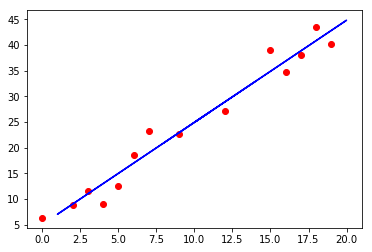

In [7]:
# veri gorsellestirme
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.show()